#BI Projekt - Topmotive

##Zugriff auf die Daten:

In [1]:
import pandas as pd

In [2]:
df_Verrechnung = pd.read_csv('TM_WA_Verrechnungssätze.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_Verrechnung

,LocalID,AWArt,AWArt_Bez,VKPreis,VKPreis_Brutto,EKPreis,AWMinuten,c_date
0,0007BD7B-6934-4893-B971-CCA4857B1789,EL,Elektrikarbeiten,"12,40","14,76","6,80","6,00",01.07.2023 11:29:12
1,0007BD7B-6934-4893-B971-CCA4857B1789,KA,Karosseriearbeiten,"13,00","15,47","6,80","6,00",01.07.2023 11:29:12
2,0007BD7B-6934-4893-B971-CCA4857B1789,LA,Lackierarbeiten,"13,00","15,47","6,80","6,00",01.07.2023 11:29:12
3,0007BD7B-6934-4893-B971-CCA4857B1789,NaN,Verrechnungssatz Autohaus Zorn,"85,71","102,00","6,90","6,00",01.07.2023 11:29:12
4,0007BD7B-6934-4893-B971-CCA4857B1789,WS,Werkstattarbeiten,"10,30","12,26","6,30","6,00",01.07.2023 11:29:12
...,...,...,...,...,...,...,...,...
12059,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,VL,Versicherung Lack,"165,50","196,95","165,50","60,00",01.08.2023 05:59:20
12060,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,VM,Versicherung Mechanik,"135,50","161,25","135,50","60,00",01.08.2023 05:59:20
12061,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,WS,Werkstattarbeiten,"110,50","131,50","0,00","60,00",01.08.2023 05:59:20
12062,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,NaN,Werkstattarbeiten 2,"59,95","71,34","59,95","60,00",01.08.2023 05:59:20


##Erläuterung den Datenmerkmale der Tabelle TM_WA_Verrechnungssätze.csv (df_Verrechnung)

LocalID: GUID einer einzelnen Werkstatt

AWArt: Arbeitswerte Art Kürzel

AWArt_Bez: Bezeichnung der Arbeitswerte Art

VKPreis: Verkaufspreis für ein AW

VKPreis_Brutto: Verkaufspreis Brutto für ein AW

EKPreis: Einkaufspreis für ein AW

AWMinuten: Anzahl Minuten pro AW (Arbeitswert)

c_date: Anlieferungsdatum der Daten

In [3]:
df_Belege = pd.read_csv('TM_WA_Belege_sample.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_Belege

/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ï»¿LocalID,BELEG_ART,BELEGDATUM,KTypNr,Fzg_Hersteller,ERSTZULASSUNG,KMSTAND,POS_ART,TEXT1,GENARTNR,...,RechEmpfPLZ,RechEmpfAnrede,RechEmpfhatEMail,RechEmpfhatMobil,RechEmpfmitGeburtstag,Belegerstelltam,Beleggedrucktam,hatbelegversicherdaten,RechEmpfistVersichert,Programmvariant
0,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230706.0,11877,BMW,20170221.0,93572,A,INNENRAUMFILTER ERNEUERN,NaN,...,42719,Herrn,NEIN,NEIN,NEIN,20211209.0,20230706.0,NEIN,NEIN,100.0
1,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230709.0,119580,MERCEDES-BENZ,20190410.0,38386,A,KENNZEICHEN : BM-GG 152 KOSTENSTELLE : 1231,NaN,...,50389,Firma,JA,JA,NEIN,20221128.0,20230709.0,NEIN,NEIN,100.0
2,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230601.0,34951,VW,20111014.0,175780,A,QUERLENKER LINKS UNTEN ERNEUERN (VORDERACHSE),NaN,...,50389,Firma,NEIN,JA,NEIN,20230110.0,20230601.0,NEIN,NEIN,100.0
3,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230601.0,34951,VW,20111014.0,175780,A,LUFTFILTEREINSATZ ERNEUERN,NaN,...,50389,Firma,NEIN,JA,NEIN,20230110.0,20230601.0,NEIN,NEIN,100.0
4,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230709.0,58535,FORD,20160727.0,117214,E,WISCHBLATT,298.0,...,41460,Firma,JA,JA,NEIN,20230202.0,20230709.0,NEIN,NEIN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104495,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230720.0,7932,VW,19971126.0,87541,A,Abgasuntersuchung,NaN,...,49610,Firma,NEIN,NEIN,NEIN,20230714.0,20230720.0,NEIN,NEIN,100.0
104496,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230724.0,108631,VW,20190423.0,86091,E,MotorËl Liqui Moly Longlife 5W30 4200,3224.0,...,49661,Frau,NEIN,NEIN,NEIN,20230717.0,20230724.0,NEIN,NEIN,100.0
104497,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230718.0,25508,AUDI,20111026.0,203253,E,"OELABLASS-SCHR. 14X1,5 VW/SEAT",593.0,...,49610,Herrn,NEIN,JA,NEIN,20230717.0,20230718.0,NEIN,NEIN,100.0
104498,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230718.0,18418,AUDI,20080317.0,250614,E,"Filter, Innenraumluft",424.0,...,49610,Herrn,NEIN,JA,NEIN,20230717.0,20230718.0,NEIN,NEIN,100.0


##Erläuterung den Datenmerkmale der Tabelle TM_WA_Belege_sample.csv (df_Belege)

LocalID: GUID einer einzelnen Werkstatt

BelegID: ID, welche innerhalb einer Werkstatt die Positionen zu einem Vorgang zusammenfast

BELEG_ART: Typ des Beleges; R = Rechnung, G = Gutschrift

BELEGDATUM: Datum des Beleges

KTypNr: Fahrzeugtyp ID des betreffenden Kunden Fahrzeuges

Fzg_Hersteller: Fahrzeug Hersteller des Fahrzeuges

ERSTZULASSUNG: Erstzulassung des betreffenden Kunden Fahrzeuges

KMSTAND: Kilometerstand/Fahrleistung des betreffenden Kunden Fahrzeuges; 0: nicht angegeben

POS_ART: Typ/Art der einzelnen Position ->key_PosArt.csv

TEXT1: Erster Text für die einzelne Position

GENARTNR: ID der Produktgruppe für ET. Nicht immer vorhanden

GENART_BEZ: Bezeichnung der Produktgruppe

Menge: Menge

Mengeneinheit: Mengeneinheit zur Menge

VK_Preis: Verkaufspreis

MWST_Prozent: Mehrwertsteuer

Minuten_pro_AW: Anzahl Minuten pro AW (Arbeitswert)

PLZ: PLZ der Werkstatt

EKPreis: Einkaufspreis

Pos_Text2: Text 2 für die einzelne Position

Fzg_anlage_datum: Anlage Datum des betreffenden Kunden Fahrzeuges

RechEmpfPLZ: PLZ des Rechnungsempfängers

RechEmpfAnrede: Anrede des Rechnungsempfängers

RechEmpfhatEMail: EMail Adresse vorhanden vom Rechnungsempfänger JA/NEIN

RechEmpfhatMobil: Mobil-Nummer vorhanden vom Rechnungsempfänger JA/NEIN

RechEmpfmitGeburtstag: Geburtstag vorhanden vom Rechnungsempfänger JA/NEIN

Belegerstelltam: Erstellungsdatum des Beleges

Beleggedrucktam: Datum des Ausdruckes des Beleges

Hatbelegversicherdaten: Versicherungsdaten vorhanden JA/NEIN

RechEmpfistVersichert: Ist Rechnungsempfänger versichert JA/NEIN

Programmvariant: Version des Werkstatt Programmes

In [4]:
df_PosArt = pd.read_csv('Key_PosArt.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_PosArt

,PosArt,Bezeichnung
0,A,AW = Arbeitswert Position
1,B,AW (Fremdarbeit)
2,D,AW (Durchläufer §10) - Immer SteuerNr 4 (0%)
3,E,ET = Ersatzteil
4,O,ET(Öle/Schmierstoffe)


##Erläuterung den Datenmerkmale der Tabelle Key_PosArt.csv (df_PosArt)

PosArt: Typ/Art der einzelnen Position

Bezeichnung: Bezeichnung der PosArt

##Deskriptive Statistik:

count: Anzahl der nicht fehlenden (nicht-NA/null) Einträge.

mean: Der Durchschnittswert der Einträge.

std: Die Standardabweichung, die die Streuung der Daten um den Durchschnitt herum misst.

min: Der kleinste Wert.

25%: Das 25. Perzentil, d.h. 25% der Daten liegen unter diesem Wert.

50%: Das Median oder 50. Perzentil.

75%: Das 75. Perzentil, d.h. 75% der Daten liegen unter diesem Wert.

max: Der größte Wert.

In [24]:
print("Verrechnung")
print(df_Verrechnung.describe())

Verrechnung
                                     LocalID AWArt          AWArt_Bez VKPreis  \
count                                  12064  7985              12064   12059   
unique                                  1007   122               1425    1155   
top     86E3ED88-C918-4BCD-9BA1-E8F38E8A4560    WS  Werkstattarbeiten   95,00   
freq                                     147  1748               1683     388   

       VKPreis_Brutto EKPreis AWMinuten               c_date  
count           12059   12059     12059                12064  
unique           1183     220         7                 1877  
top            113,05    0,00     60,00  01.08.2023 06:42:22  
freq              413    9908      7909                   53  


Bei der Tabelle Verrechnung konnte beobachetet werden:

1. Für "AWArt" gibt es nur 7985 Einträge, was bedeutet, dass es einige fehlende Daten in dieser Spalte gibt.
2. Einige Spalten für "LocalID" sind nicht eindeutig (da "unique" weniger ist als "count"). Das könnte ein Zeichen für redundante Daten oder Fehler sein.
3. Die Spalte "EKPreis" hat einen häufigsten Wert von "0,00", der 9908 Mal auftritt. Dies könnte darauf hinweisen, dass viele Artikel kostenlos sind oder dass fehlende/unaufgefüllte Werte als "0,00" markiert sind.

In [6]:
print("Belege")
print(df_Belege.describe())

Belege
         BELEGDATUM         KTypNr  ERSTZULASSUNG       KMSTAND      GENARTNR  \
count  1.031580e+05  104500.000000   1.009530e+05  1.045000e+05  41107.000000   
mean   2.022048e+07   43056.056775   2.009287e+07  1.316264e+05   2264.118569   
std    3.913724e+04   44574.531769   5.785383e+05  1.351646e+05   6212.767313   
min    1.995070e+07       0.000000   1.010100e+04  0.000000e+00  -7528.000000   
25%    2.023061e+07   11329.000000   2.007092e+07  6.272500e+04    188.000000   
50%    2.023063e+07   22555.000000   2.012062e+07  1.156570e+05    655.000000   
75%    2.023071e+07   59068.000000   2.016070e+07  1.762240e+05   3096.000000   
max    2.023073e+07  153369.000000   6.106032e+07  9.582192e+06  85017.000000   

        MWST_Prozent           PLZ  Fzg_anlage_datum  Belegerstelltam  \
count  104500.000000  99429.000000      1.005320e+05     1.004480e+05   
mean       17.663866  42525.054149      2.019484e+07     2.022512e+07   
std         4.826185  23084.864951      8.46

Bei der Tabelle Belege konnte beobachetet werden :

1. BELEGDATUM, ERSTZULASSUNG, Fzg_anlage_datum, Belegerstelltam, Beleggedrucktam sind Datumsangaben in numerischem Format YYYYMMDD. Der Großteil der Daten liegt zwischen 2022 und 2023. Es gibt jedoch einige ungewöhnliche Mindestwerte, wie 1.010100e+04 für ERSTZULASSUNG, es wäre der 1. Januar 2001.
2. KTypNr: Die Werte variieren stark, mit einem Median von 22555 und einem Maximum von 153369
3. KMSTAND: Der Durchschnittskilometerstand liegt bei ca. 131.626 km. Das Maximum von ca. 9.582.192 km scheint ungewöhnlich hoch und könnte ein Ausreißer oder ein Fehler sein.
4. GENARTNR: Die Werte variieren erheblich, und es gibt negative Werte (wie das Minimum von -7528), die ungewöhnlich erscheinen.
5. MWST_Prozent: Die Mehrwertsteuer liegt größtenteils bei 19%, mit Schwankungen zwischen 0% und 20%.
6. Programmvariant: Fast alle Werte liegen bei 100, aber es gibt einige wenige Abweichungen bis zu einem Maximum von 104.
7. Es gibt Spalten mit fehlenden Werten:
    BELEGDATUM: 103158
    ERSTZULASSUNG: 100953
    GENARTNR: 41107
    PLZ: 99429
    Fzg_anlage_datum: 100532
    Belegerstelltam: 100448
    Beleggedrucktam: 93877
    Programmvariant: 103157



In [7]:
print("PosArt")
print(df_PosArt.describe())

PosArt
       PosArt                Bezeichnung
count       5                          5
unique      5                          5
top         A  AW = Arbeitswert Position
freq        1                          1


Bei der Tabelle PosArt konnten keine Auffälligkeiten beobachetet werden.

##Datentyp prüfen

###Datentyp der Tabelle df_Verrechnung

In [8]:
df_Verrechnung.dtypes

LocalID           object
AWArt             object
AWArt_Bez         object
VKPreis           object
VKPreis_Brutto    object
EKPreis           object
AWMinuten         object
c_date            object
dtype: object

Auffäligkeiten:

1. Potentiell Falsche Datentypen für Preise und Minuten:

VKPreis (Verkaufspreis), VKPreis_Brutto (Bruttoverkaufspreis) und EKPreis (Einkaufspreis) könnten numerische Werte enthalten, sind aber als object typisiert. Normalerweise würden diese Daten als float (für Dezimalzahlen) oder int (für ganze Zahlen) erwarten, je nachdem, ob sie Dezimalstellen enthalten oder nicht.

AWMinuten (Anzahl Minuten pro Arbeitswert) scheint ebenfalls ein numerischer Wert zu sein, ist aber als object klassifiziert, sollte zu int umgewandelt werden.

2. c_date als Objekt:
c_date (Anlieferungsdatum der Daten) sollte wahrscheinlich als Datum typisiert sein, ist aber als object angegeben. Dies deutet darauf hin, dass es als String repräsentiert wird.

## Datentypen der Tabelle df_Verrechnung entsprechen anpassen

### Überprüfung den Rohdaten vor der Typumwandlung

In [9]:
print(df_Verrechnung[['VKPreis', 'VKPreis_Brutto', 'EKPreis', 'AWMinuten']].head())

  VKPreis VKPreis_Brutto EKPreis AWMinuten
0   12,40          14,76    6,80      6,00
1   13,00          15,47    6,80      6,00
2   13,00          15,47    6,80      6,00
3   85,71         102,00    6,90      6,00
4   10,30          12,26    6,30      6,00


Auffäligkeiten:

1. Die Daten liegen in einem, für die Umwandlug, ungeeignetem Format, heisst die sind mit Kommas statt mit einem Punkt getrennt

In [10]:
# Erstelle eine Kopie von df_Verrechnung und speichere sie in df_Verrechnung_dt
df_Verrechnung_dt = df_Verrechnung.copy()

# Ersetze Kommas durch Punkte und konvertiere zu float
df_Verrechnung_dt['VKPreis'] = df_Verrechnung['VKPreis'].str.replace(',', '.').astype(float)
df_Verrechnung_dt['VKPreis_Brutto'] = df_Verrechnung['VKPreis_Brutto'].str.replace(',', '.').astype(float)
df_Verrechnung_dt['EKPreis'] = df_Verrechnung['EKPreis'].str.replace(',', '.').astype(float)
df_Verrechnung_dt['AWMinuten'] = df_Verrechnung['AWMinuten'].str.replace(',', '.').astype(float)

# Konvertiere AWMinuten zu int
df_Verrechnung_dt['AWMinuten'] = df_Verrechnung_dt['AWMinuten'].round(0).astype('Int64')

# Konvertiere c_date zu datetime
df_Verrechnung_dt['c_date'] = pd.to_datetime(df_Verrechnung['c_date'], errors='coerce')

# Überprüfe die Ergebnisse
print(df_Verrechnung_dt[['VKPreis', 'VKPreis_Brutto', 'EKPreis', 'AWMinuten']].head())

# Überprüfe die neuen Datentypen
print(df_Verrechnung_dt.dtypes)

   VKPreis  VKPreis_Brutto  EKPreis  AWMinuten
0    12.40           14.76      6.8          6
1    13.00           15.47      6.8          6
2    13.00           15.47      6.8          6
3    85.71          102.00      6.9          6
4    10.30           12.26      6.3          6
LocalID                   object
AWArt                     object
AWArt_Bez                 object
VKPreis                  float64
VKPreis_Brutto           float64
EKPreis                  float64
AWMinuten                  Int64
c_date            datetime64[ns]
dtype: object


###Datentyp der Tabelle df_Belege

In [11]:
df_Belege.dtypes

ï»¿LocalID                 object
BELEG_ART                  object
BELEGDATUM                float64
KTypNr                      int64
Fzg_Hersteller             object
ERSTZULASSUNG             float64
KMSTAND                     int64
POS_ART                    object
TEXT1                      object
GENARTNR                  float64
GENART_BEZ                 object
Menge                      object
Mengeneinheit              object
VK_Preis                   object
MWST_Prozent                int64
Minuten_pro_AW             object
PLZ                       float64
EKPreis                    object
Pos_Text2                  object
Fzg_anlage_datum          float64
RechEmpfPLZ                object
RechEmpfAnrede             object
RechEmpfhatEMail           object
RechEmpfhatMobil           object
RechEmpfmitGeburtstag      object
Belegerstelltam           float64
Beleggedrucktam           float64
hatbelegversicherdaten     object
RechEmpfistVersichert      object
Programmvarian

Auffäligkeiten:

1. Datumsangaben als float64:
BELEGDATUM, ERSTZULASSUNG, Fzg_anlage_datum, Belegerstelltam, Beleggedrucktam sollten als Datumstypen (datetime) behandelt werden.

2. Numerische Werte als object:
Menge, VK_Preis, EKPreis sollten als numerische Typen (wahrscheinlich float) behandelt werden.
Minuten_pro_AW sollte als int behandelt werden.

3. Postleitzahlen als float64:
PLZ und RechEmpfPLZ sollten als object (Strings) bleiben, um eventuelle führende Nullen zu bewahren.

4. Boolean-Werte für Ja/Nein-Attribute:
RechEmpfhatEMail, RechEmpfhatMobil, RechEmpfmitGeburtstag, hatbelegversicherdaten, RechEmpfistVersichert könnten in Booleans (True/False) umgewandelt werden.

5. Kategorische Daten:
BELEG_ART, Fzg_Hersteller, POS_ART, TEXT1, GENART_BEZ, Mengeneinheit, RechEmpfAnrede könnten als kategorische Typen (category) behandelt werden.

6. MWST_Prozent:
Bleibt als int64, es sei denn, es gibt Fälle, in denen Dezimalstellen vorkommen, dann sollte es zu float geändert werden.

7. GUIDs und IDs:
LocalID und BelegID sollten als object (Strings) bleiben.


###Datentypen der Tabelle df_Belege entsprechen anpassen

In [12]:
# Erstelle eine Kopie von df_Belege und speichere sie in df_Belege_dt
df_Belege_dt = df_Belege.copy()

# Konvertiere die Datumsangaben von float64 zu datetime
datumsfelder = ['BELEGDATUM', 'ERSTZULASSUNG', 'Fzg_anlage_datum', 'Belegerstelltam', 'Beleggedrucktam']
for feld in datumsfelder:
    df_Belege_dt[feld] = pd.to_datetime(df_Belege_dt[feld], unit='s', errors='coerce')

# Konvertiere numerische Werte, die als object typisiert sind
numerische_felder = ['Menge', 'VK_Preis', 'EKPreis']
for feld in numerische_felder:
    df_Belege_dt[feld] = pd.to_numeric(df_Belege_dt[feld], errors='coerce')

# Konvertiere Minuten_pro_AW zu int
df_Belege_dt['Minuten_pro_AW'] = pd.to_numeric(df_Belege_dt['Minuten_pro_AW'], errors='coerce').astype('Int64')

# Konvertiere Booleans
bool_felder = ['RechEmpfhatEMail', 'RechEmpfhatMobil', 'RechEmpfmitGeburtstag', 'hatbelegversicherdaten', 'RechEmpfistVersichert']
for feld in bool_felder:
    df_Belege_dt[feld] = df_Belege_dt[feld].map({'JA': True, 'NEIN': False})

# Konvertiere kategorische Daten
kategorische_felder = ['BELEG_ART', 'Fzg_Hersteller', 'POS_ART', 'TEXT1', 'GENART_BEZ', 'Mengeneinheit', 'RechEmpfAnrede']
for feld in kategorische_felder:
    df_Belege_dt[feld] = df_Belege_dt[feld].astype('category')

# Überprüfe die neuen Datentypen
print(df_Belege_dt.dtypes)

ï»¿LocalID                        object
BELEG_ART                       category
BELEGDATUM                datetime64[ns]
KTypNr                             int64
Fzg_Hersteller                  category
ERSTZULASSUNG             datetime64[ns]
KMSTAND                            int64
POS_ART                         category
TEXT1                           category
GENARTNR                         float64
GENART_BEZ                      category
Menge                            float64
Mengeneinheit                   category
VK_Preis                         float64
MWST_Prozent                       int64
Minuten_pro_AW                     Int64
PLZ                              float64
EKPreis                          float64
Pos_Text2                         object
Fzg_anlage_datum          datetime64[ns]
RechEmpfPLZ                       object
RechEmpfAnrede                  category
RechEmpfhatEMail                  object
RechEmpfhatMobil                  object
RechEmpfmitGebur

##Missing Values

### Fehlende Werte der Tabelle df_Verrechnung

In [13]:
total = df_Verrechnung.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
print("Fehlende Werte bei df_Verrechnung:")
print(missing_data)

Fehlende Werte bei df_Verrechnung:
                Total
AWArt            4079
VKPreis             5
VKPreis_Brutto      5
EKPreis             5
AWMinuten           5
LocalID             0
AWArt_Bez           0
c_date              0


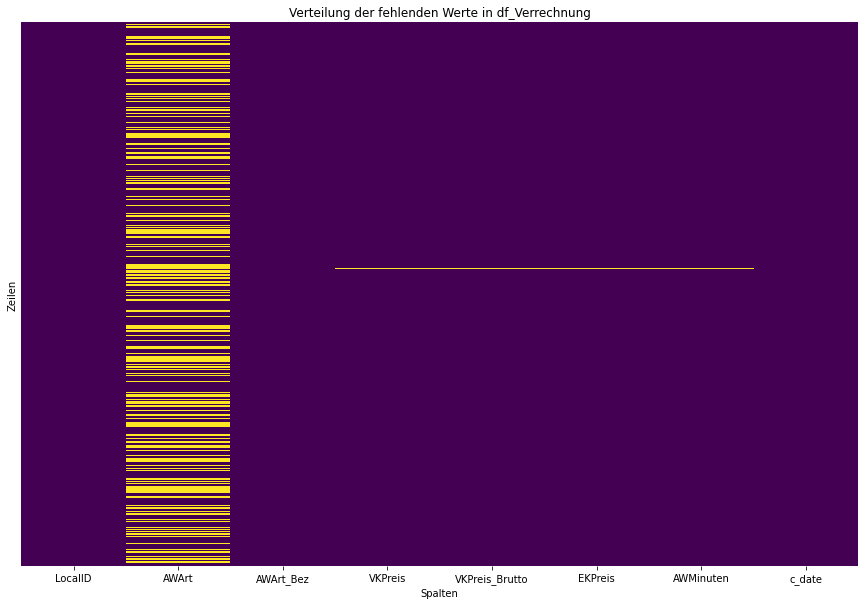

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstelle eine neue DataFrame, die True ist, wenn Werte fehlen, sonst False
missing_values = df_Verrechnung.isnull()

# Erstelle eine Heatmap, um die fehlenden Daten zu visualisieren
plt.figure(figsize=(15, 10))
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')

# Titel und Labels hinzufügen
plt.title('Verteilung der fehlenden Werte in df_Verrechnung')
plt.xlabel('Spalten')
plt.ylabel('Zeilen')

# Zeige das Diagramm
plt.show()

Auffäligkeiten:

1. Insgesamt scheint der Datensatz recht vollständig zu sein, mit Ausnahme der relativ hohen Anzahl an fehlenden Werten in der Spalte "AWArt"

2. AWArt (4079 fehlende Werte): Dies könnte darauf hindeuten, dass in vielen Fällen die spezifische Arbeitswert-Art (AWArt) nicht erfasst wurde. Dies könnte ein Indikator dafür sein, dass diese Information oft nicht verfügbar ist oder dass sie in der Erfassungsroutine häufig übergangen wird.

3. KPreis, VKPreis_Brutto, EKPreis, AWMinuten: bestimmte Zeilen insgesamt diese Werte nicht beinhalten. Dies könnte auf systematische Probleme in der Datenerfassung hinweisen.
Die visuelle Darstellung zeigt, dass fehlende Werte in bestimmten Spalten zusammenhängen und nicht zufällig verteilt sind.

### Fehledne Werte der Tabelle df_Belege

In [15]:
total = df_Belege.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
print("Fehlende Werte bei df_Belege:")
print(missing_data)

Fehlende Werte bei df_Belege:
                        Total
Mengeneinheit           67789
GENART_BEZ              63953
GENARTNR                63393
Fzg_Hersteller          17108
Beleggedrucktam         10623
RechEmpfAnrede           7079
PLZ                      5071
Belegerstelltam          4052
Fzg_anlage_datum         3968
ERSTZULASSUNG            3547
RechEmpfhatMobil         1842
RechEmpfhatEMail         1842
RechEmpfmitGeburtstag    1842
Pos_Text2                1578
Programmvariant          1343
hatbelegversicherdaten   1342
RechEmpfistVersichert    1342
BELEGDATUM               1342
RechEmpfPLZ               436
TEXT1                     313
EKPreis                     1
ï»¿LocalID                  0
BELEG_ART                   0
MWST_Prozent                0
VK_Preis                    0
Menge                       0
POS_ART                     0
KMSTAND                     0
KTypNr                      0
Minuten_pro_AW              0


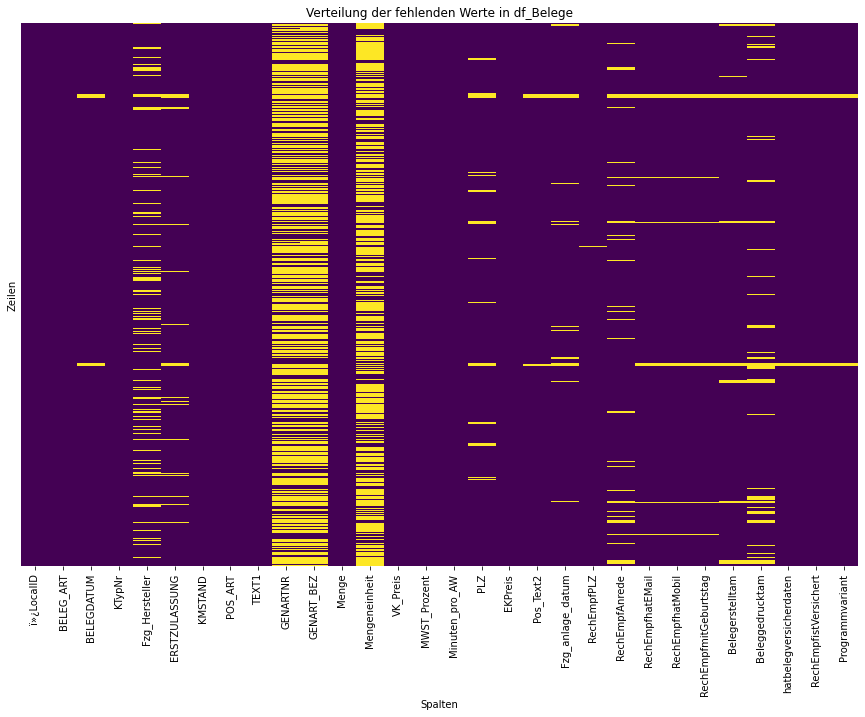

In [16]:
# Erstelle eine neue DataFrame, die True ist, wenn Werte fehlen, sonst False
missing_values = df_Belege.isnull()

# Erstelle eine Heatmap, um die fehlenden Daten zu visualisieren
plt.figure(figsize=(15, 10))
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')

# Titel und Labels hinzufügen
plt.title('Verteilung der fehlenden Werte in df_Belege')
plt.xlabel('Spalten')
plt.ylabel('Zeilen')

# Zeige das Diagramm
plt.show()

Auffäligkeiten:

1. Hohe Anzahl an fehlenden Werten in bestimmten Spalten:
Die Spalten Mengeneinheit, GENART_BEZ und GENARTNR zeigen eine sehr hohe Anzahl an fehlenden Werten. Dies könnte darauf hindeuten, dass in vielen Fällen spezifische Informationen zu Produktgruppen oder Einheiten nicht erfasst wurden. Es könnte ein Hinweis darauf sein, dass diese Angaben für einige Vorgänge nicht relevant, nicht verfügbar oder bei der Dateneingabe häufig übersehen werden.

2. Daten zu Fahrzeugen unvollständig:
Für Spalten wie Fzg_Hersteller und ERSTZULASSUNG gibt es eine hohe Anzahl an fehlenden Daten. Das Fehlen dieser Informationen könnte auf eine inkonsistente Erfassung von Fahrzeugdaten hinweisen oder darauf, dass diese Daten in bestimmten Fällen schwer zu beschaffen sind.

3. Fehlende Kontaktinformationen und persönliche Details:
Kontaktinformationen wie RechEmpfhatEMail, RechEmpfhatMobil und RechEmpfmitGeburtstag fehlen relativ oft, was darauf schließen lässt, dass Kunden diese Daten möglicherweise nicht immer angeben oder dass die Erfassung dieser Informationen nicht konsequent durchgeführt wird.

4. Muster in den fehlenden Daten:
Die grafische Darstellung zeigt eindeutige Muster, in denen bestimmte Zeilenbereiche über viele Spalten hinweg fehlende Werte aufweisen. Dies könnte auf spezifische Vorgänge oder Datensätze hinweisen, bei denen systematisch Informationen fehlen.

5. Zeitbezogene Daten und ihre Inkonsistenzen:
Spalten wie Beleggedrucktam und Belegerstelltam weisen eine erhebliche Anzahl an fehlenden Werten auf. Dies deutet auf möglicherweise technische Probleme oder manuelle Eingabefehler hin.

# Duplikate in den Daten

### Duplikate der Tabelle df_Verrechnung

In [17]:
# Finde alle Duplikate
duplikate = df_Verrechnung[df_Verrechnung.duplicated(keep=False)]

# Zeige die Anzahl der Duplikate an
print(f"Anzahl der Duplikate in df_Verrechnung: {duplikate.shape[0]}")

# Zeige die Duplikate an
if not duplikate.empty:
    print("Duplikate in der Tabelle df_Verrechnung:")
    print(duplikate)
else:
    print("Keine Duplikate gefunden.")

Anzahl der Duplikate in df_Verrechnung: 94
Duplikate in der Tabelle df_Verrechnung:
                                    LocalID AWArt          AWArt_Bez VKPreis  \
485    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
486    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
491    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
492    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
1171   190B15A6-397A-420B-A60B-2F5219441119   NaN          Werkstatt    8,50   
...                                     ...   ...                ...     ...   
11539  F87A293C-E22D-452F-8BA8-45231838C19C    LA    Lackierarbeiten  120,00   
11540  F87A293C-E22D-452F-8BA8-45231838C19C    WS  Werkstattarbeiten   67,23   
11541  F87A293C-E22D-452F-8BA8-45231838C19C    WS  Werkstattarbeiten   67,23   
11542  F87A293C-E22D-452F-8BA8-45231838C19C    ZB    Zubehörarbeiten   67,23   
11543  F87A293C-E22D-452F-8BA8-45231

### Duplikate der Tabelle df_Belege

In [18]:
# Finde alle Duplikate
duplikate = df_Belege[df_Belege.duplicated(keep=False)]

# Zeige die Anzahl der Duplikate an
print(f"Anzahl der Duplikate in df_Belege: {duplikate.shape[0]}")

# Zeige die Duplikate an
if not duplikate.empty:
    print("Duplikate in der Tabelle df_Belege:")
    print(duplikate)
else:
    print("Keine Duplikate gefunden.")

Anzahl der Duplikate in df_Belege: 280
Duplikate in der Tabelle df_Belege:
                                  ï»¿LocalID BELEG_ART  BELEGDATUM  KTypNr  \
1809    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20220712.0   15507   
1810    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20220712.0   15507   
1957    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20221022.0   16283   
1961    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20221022.0   16283   
3337    049E72E0-DFC3-47AA-A1EC-BCE82C0D2D20         R  20230622.0   53300   
...                                      ...       ...         ...     ...   
103410  C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F         R  20030403.0     785   
103863  C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F         R  20051126.0   18692   
103864  C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F         R  20051126.0   18692   
104311  C5D8539A-10D1-4BCC-97D9-E0520C8F8221         R  20230608.0   32274   
104313  C5D8539A-10D1-4BCC-97D9-E0520C8F8221         R  20230608.0 

Auffäligkeiten:

1. Die LocalID sollte theoretisch ein einzigartiger Schlüssel für jede Werkstatt sein. Wenn es mehrere Zeilen mit derselben LocalID und identischen anderen Werten gibt, deutet dies auf eine fehlerhafte Datenerfassung hin.

2. Duplikate beinhalten keine nützlichen Informationen und sollten daher entfernt werden, um die Datenintegrität zu wahren.

### Duplikate der Tabelle df_Verrechnung entfernen

In [19]:
# Entferne Duplikate, behalte die erste Instanz (hier wird die df_Verrechnung_dt verwendet, mit bereits angepassten Datentypen)
df_Verrechnung_cleaned = df_Verrechnung_dt.drop_duplicates()

print("Anzahl der Einträge in der Tabelle mit Duplikaten: ", df_Verrechnung_dt.shape[0] , ", und Anzahl der Einträge in der Tabelle ohne Duplikaten: ", df_Verrechnung_cleaned.shape[0])

Anzahl der Einträge in der Tabelle mit Duplikaten:  12064 , und Anzahl der Einträge in der Tabelle ohne Duplikaten:  12011


### Duplikate der Tabelle df_Belege entfernen

In [20]:
# Entferne Duplikate, behalte die erste Instanz (hier wird die df_Belege_dt verwendet, mit bereits angepassten Datentypen)
df_Belege_cleaned = df_Belege_dt.drop_duplicates()

print("Anzahl der Einträge in der Tabelle mit Duplikaten: ", df_Belege_dt.shape[0] , ", und Anzahl der Einträge in der Tabelle ohne Duplikaten: ", df_Belege_cleaned.shape[0])

Anzahl der Einträge in der Tabelle mit Duplikaten:  104500 , und Anzahl der Einträge in der Tabelle ohne Duplikaten:  104166


#Verteilung den Daten

### Folgende Diagramme sind für die Darstellung folgenden Daten geeignet:

1. Für Kategorische Daten:
    1. Balkendiagramm: Gut geeignet, um die Häufigkeit von Kategorien zu zeigen.
    2. Kreisdiagramm: Kann verwendet werden, wenn es nicht zu viele Kategorien gibt.
2. Für Numerische Daten:    
    1. Histogramm: Zeigt die Verteilung von numerischen Daten.
    2. Boxplot: Kann verwendet werden, um Ausreißer und die Verteilung von Quartilen zu identifizieren.

##Für df_Verrchnung 
(für alle Darstellung wird das df mit bereits entferneten Duplikaten und angepassten Datentypen genutzt)

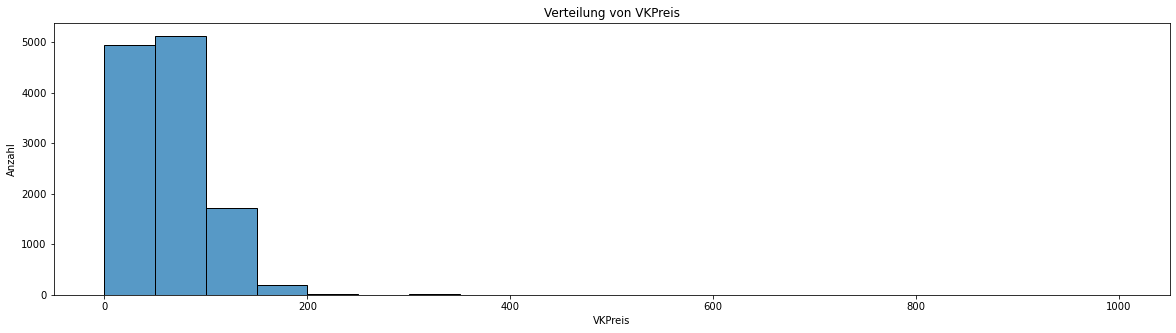

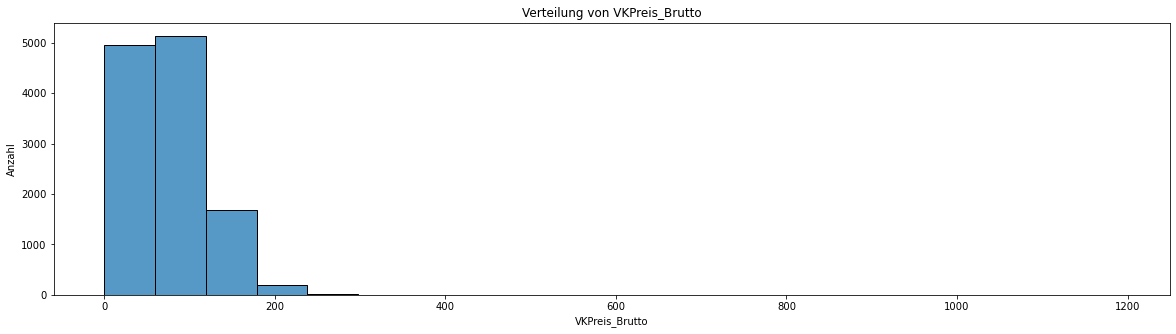

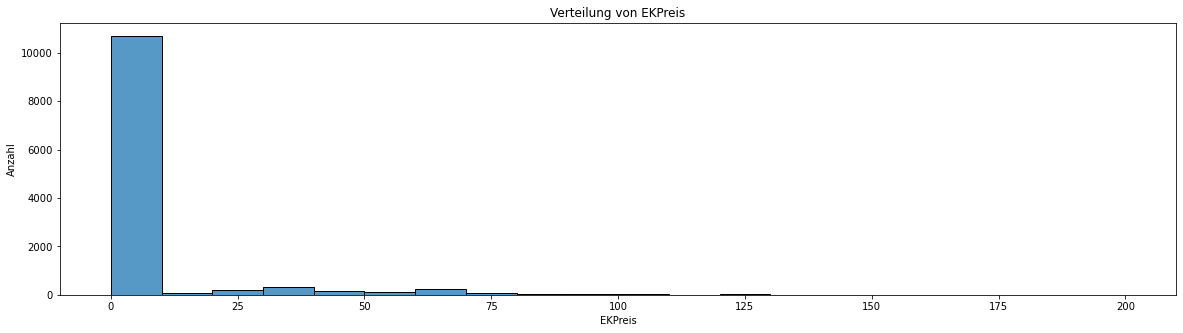

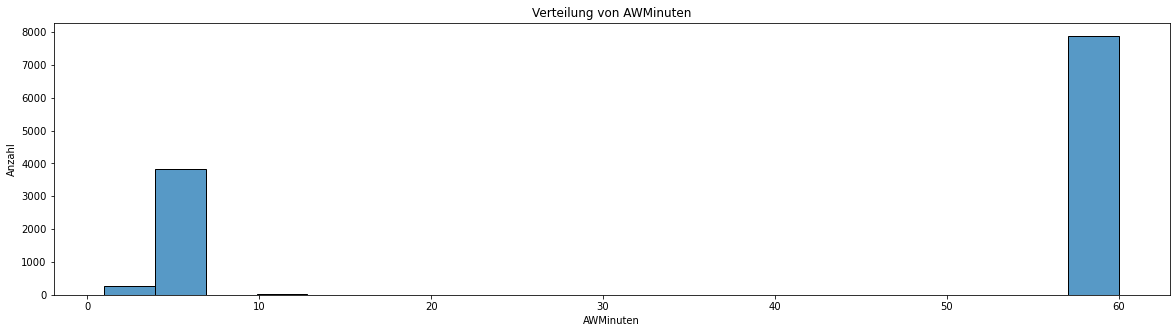

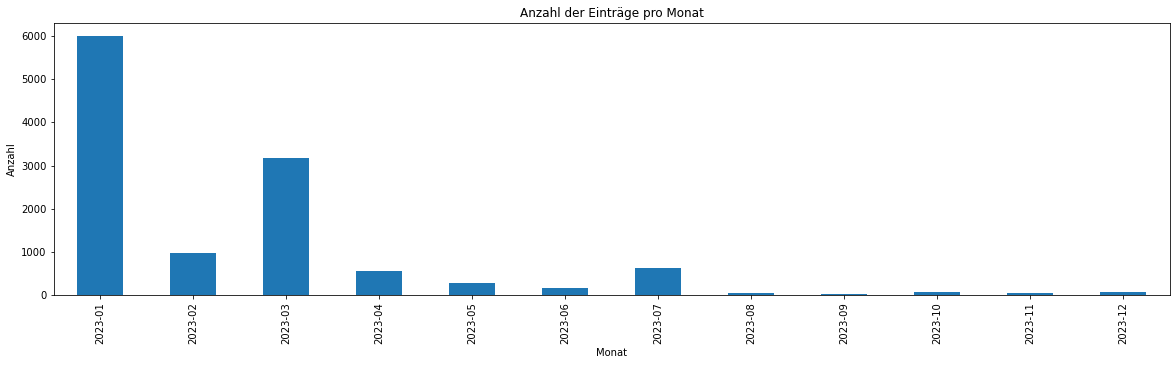

In [21]:
num_attributes = ['VKPreis', 'VKPreis_Brutto', 'EKPreis', 'AWMinuten']

for attribute in num_attributes:
    plt.figure(figsize=(20, 5))
    sns.histplot(df_Verrechnung_cleaned[attribute].dropna(), kde=False, bins=20)  # KDE auf False setzen, wenn man keine Dichteschätzung braucht
    plt.title(f'Verteilung von {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Anzahl')
    plt.show()

# Erstelle explizit eine Kopie des DataFrame, um die Warnung zu vermeiden
df_Verrechnung_cleaned = df_Verrechnung_dt.drop_duplicates().copy()

# Füge eine neue Spalte hinzu, die den Monat des Datums enthält
df_Verrechnung_cleaned['c_date_month'] = df_Verrechnung_cleaned['c_date'].dt.to_period('M')

# Visualisiere die Anzahl der Einträge pro Monat
plt.figure(figsize=(20, 5))
df_Verrechnung_cleaned['c_date_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl der Einträge pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl')
plt.show()

Auffäligkeiten:

1. Verteilung von VKPreis: Dieses Histogramm zeigt eine rechtschiefe Verteilung, was bedeutet, dass die meisten Datenpunkte auf der linken Seite des Diagramms liegen. Es gibt eine hohe Häufigkeit im niedrigsten Preissegment, was darauf hindeutet, dass die meisten Verkaufspreise relativ niedrig sind.

2. Verteilung von VKPreis, Brutto: Ähnlich wie das erste Diagramm zeigt auch dieses eine rechtschiefe Verteilung der Bruttoverkaufspreise.

3. Verteilung von EKPreis: Dieses Histogramm zeigt eine sehr spitze Verteilung mit einer extrem hohen Häufigkeit im niedrigsten Preissegment und fast keinen Datenpunkten in den höheren Preisbereichen. Dies deutet darauf hin, dass fast alle Einkaufspreise sehr niedrig sind.

4. Verteilung von AVMinuten: Das letzte Diagramm zeigt eine bimodale Verteilung mit zwei Spitzen: eine sehr hohe im niedrigsten Bereich und eine weitere, deutlich niedrigere Spitze im höchsten Bereich der Datenpunkte. Dies könnte darauf hindeuten, dass es zwei häufige Zeiten gibt, die für eine bestimmte Aktivität aufgewendet werden.

5. Die meiste Verrechnungssätze werden in den ersten 3 Monaten des Jahres erstellt, gegen Ende des jahres nimmt die Erstellung des Verrechnungssätzen deutlich ab.

##Für df_Belege

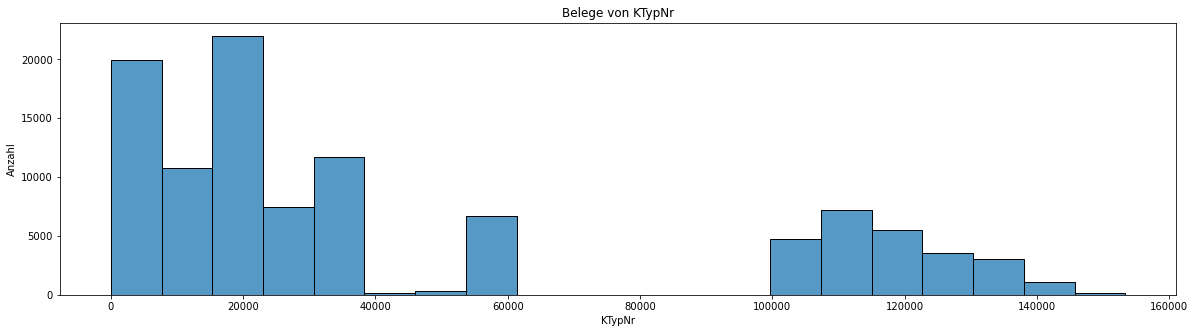

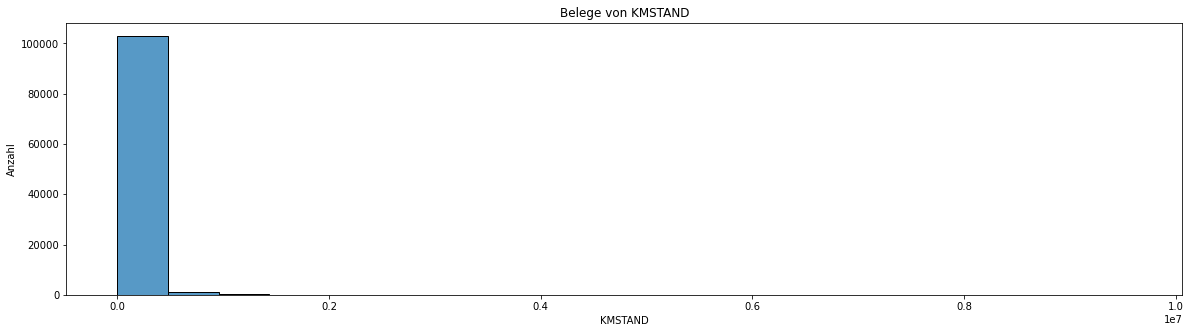

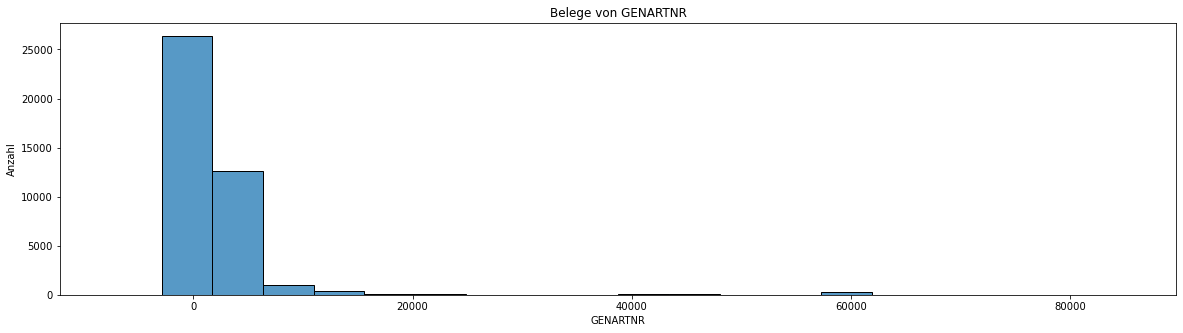

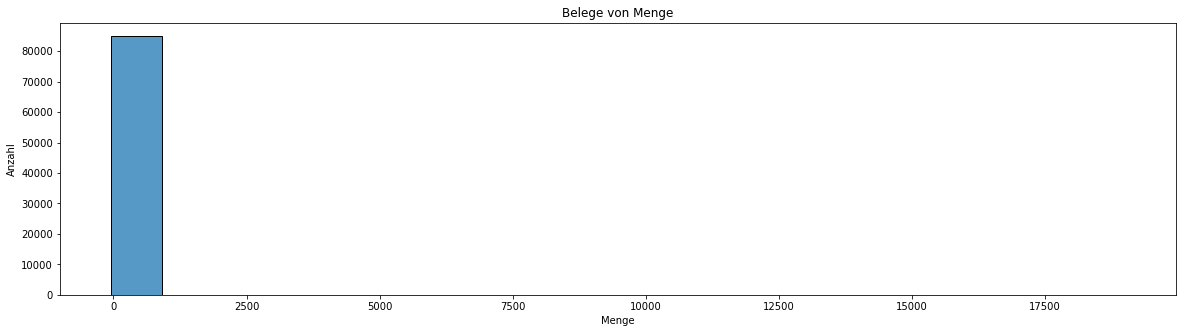

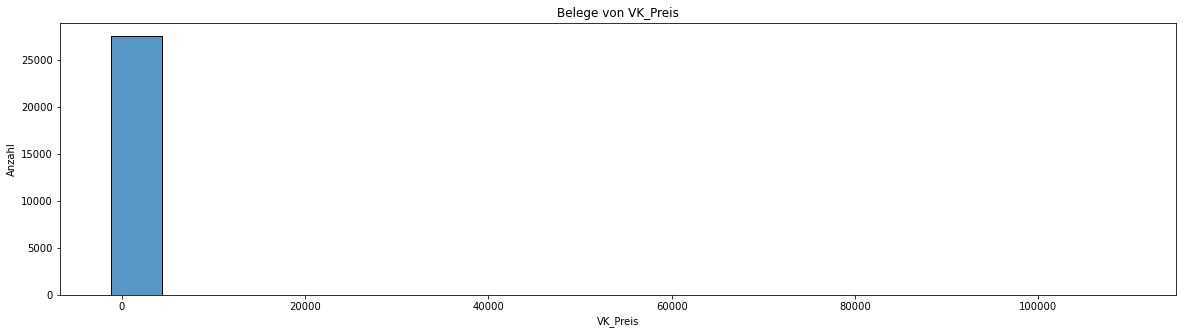

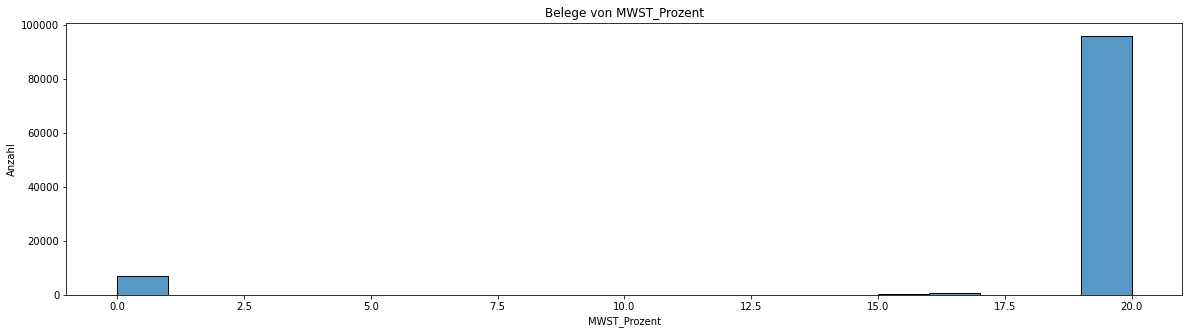

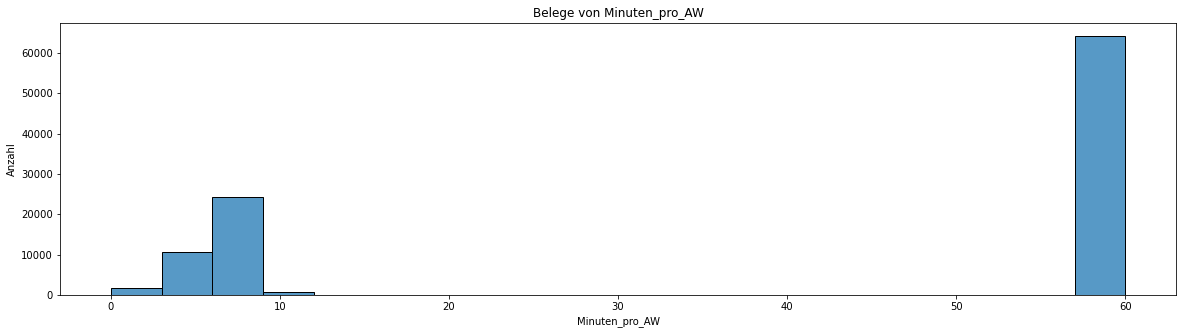

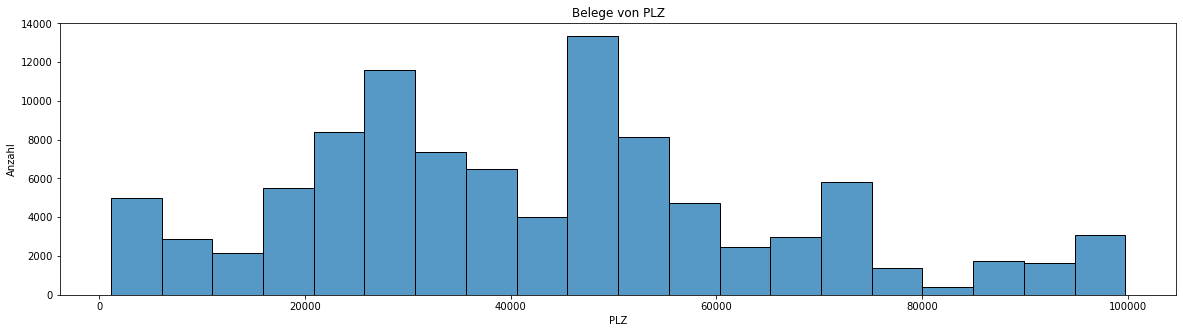

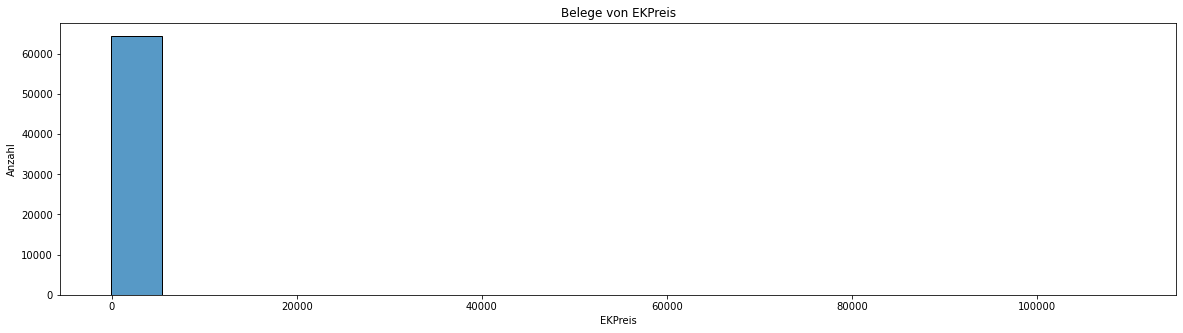

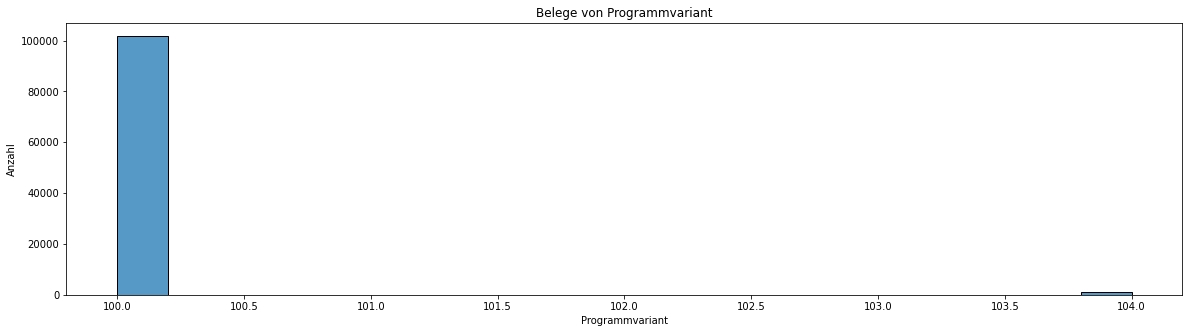

In [27]:
num_attributes = ['KTypNr', 'KMSTAND', 'GENARTNR', 'Menge', 'VK_Preis', 'MWST_Prozent', 'Minuten_pro_AW', 'PLZ', 'EKPreis', 'Programmvariant']

for attribute in num_attributes:
    plt.figure(figsize=(20, 5))
    sns.histplot(df_Belege_cleaned[attribute].dropna(), kde=False, bins=20)  # KDE auf False setzen, wenn man keine Dichteschätzung braucht
    plt.title(f'Belege von {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Anzahl')
    plt.show()

Auffäligkeiten:

1. KTypNr (Fahrzeugtyp ID):
Die Daten sind rechtsschief verteilt, mit vielen Datenpunkten bei niedrigeren IDs und weniger bei höheren IDs. Es gibt mehrere Spitzen, die auf häufig vorkommende Fahrzeugtypen hinweisen.

2. KMSTAND (Kilometerstand):
Die Verteilung zeigt, dass die meisten Fahrzeuge einen Kilometerstand in einem bestimmten (sehr kleinen) Bereich haben.

3. GENARTNR (ID der Produktgruppe):
die Verteilung zeigt, dass einige Produktgruppen viel häufiger als andere verwendet werden.

4. Menge:
Die Verteilung zeigt, dass bestimmte Mengen (niedrige) häufiger vorkommen, was auf Standardverpackungsgrößen/ übliche Bestellmengen weist hin.

5. VK_Preis (Verkaufspreis):
Diese Verteilung zeigt eine große Konzentration bei niedrigeren Preisen.

6. MWST_Prozent (Mehrwertsteuer):
Wenn die Mehrwertsteuersätze standardisiert sind, treten nur wenige verschiedene Prozentwerte auf, was sich in einer geringen Anzahl von Spitzen in der Verteilung zeigt.

7. Minuten_pro_AW (Minuten pro Arbeitswert):
Die Verteilung zeigt eine Konzentration von Datenpunkten um bestimmte Zeiteinheiten (wenigar als 10 Minuten oder 60 Minuten), was typische Arbeitszeiten für bestimmte Dienstleistungen oder Reparaturen anzeigen könnte.

8. EKPreis (Einkaufspreis):
Ähnlich wie beim Verkaufspreis zeigt die Verteilung viele niedrige Einkaufspreise und einige Ausreißer bei sehr hohen Preisen.

9. Programmvariant (Version des Werkstattprogrammes):
Die Verteilung zeigt, dass bestimmte Programmversionen (100) viel häufiger als die anderen vorkommen.
